## Auther Name - Kshama Gaikwad 

# Prediction using Decision Tree Algorithm

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Dataset

In [2]:
data=pd.read_csv(r"C:\Users\vidya\Downloads\Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Finding null values

In [6]:
data.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [7]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
data.mean(axis=0)

C:\Users\vidya\AppData\Local\Temp\ipykernel_70896\2773904261.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean(axis=0)


Id               75.500000
SepalLengthCm     5.843333
SepalWidthCm      3.054000
PetalLengthCm     3.758667
PetalWidthCm      1.198667
dtype: float64

In [10]:
data.var(axis=0)

C:\Users\vidya\AppData\Local\Temp\ipykernel_70896\1089104618.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.var(axis=0)


Id               1887.500000
SepalLengthCm       0.685694
SepalWidthCm        0.188004
PetalLengthCm       3.113179
PetalWidthCm        0.582414
dtype: float64

In [11]:
data.median(axis=0)

C:\Users\vidya\AppData\Local\Temp\ipykernel_70896\3293204435.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median(axis=0)


Id               75.50
SepalLengthCm     5.80
SepalWidthCm      3.00
PetalLengthCm     4.35
PetalWidthCm      1.30
dtype: float64

In [14]:
data.mode()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.0,3.0,1.5,0.2,Iris-setosa
1,2,NaN,NaN,NaN,NaN,Iris-versicolor
2,3,NaN,NaN,NaN,NaN,Iris-virginica
3,4,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
145,146,NaN,NaN,NaN,NaN,NaN
146,147,NaN,NaN,NaN,NaN,NaN
147,148,NaN,NaN,NaN,NaN,NaN
148,149,NaN,NaN,NaN,NaN,NaN


In [18]:
data1=data["Species"].value_counts()
data1

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Pie chart

([<matplotlib.patches.Wedge at 0x23a3a63ab80>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Iris-setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Iris-versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'Iris-virginica')])

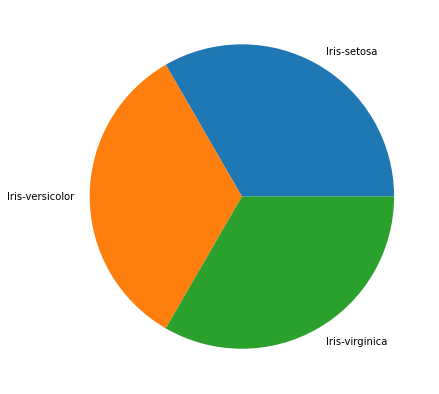

In [22]:
a=["Iris-setosa","Iris-versicolor","Iris-virginica"]
figure=plt.figure(figsize=(10,7))
plt.pie(data1,labels=a,)

# Correlation of the data

In [25]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

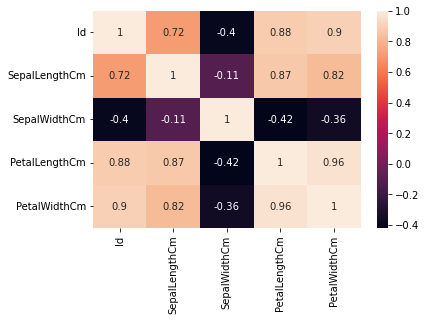

In [26]:
sns.heatmap(data.corr(),annot=True)

# Defining Independent and Dependent variable

In [27]:
x=data.drop(columns=["Species"])
y=data["Species"]

In [28]:
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [29]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

# Data divide to train_data and test_data.

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 5)
(30, 5)
(120,)
(30,)


# Model fitting using Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [33]:
dt=DecisionTreeClassifier()
a=dt.fit(x_train,y_train)
d_pred=dt.predict(x_test)
ac=accuracy_score(y_test,d_pred)*100
cm=confusion_matrix(y_test,d_pred)
cr=classification_report(y_test,d_pred)


print("Accuracy:",ac.round(2))
print("Matrix: ",cm)
print("Report: ",cr)

Accuracy: 100.0
Matrix:  [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
Report:                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



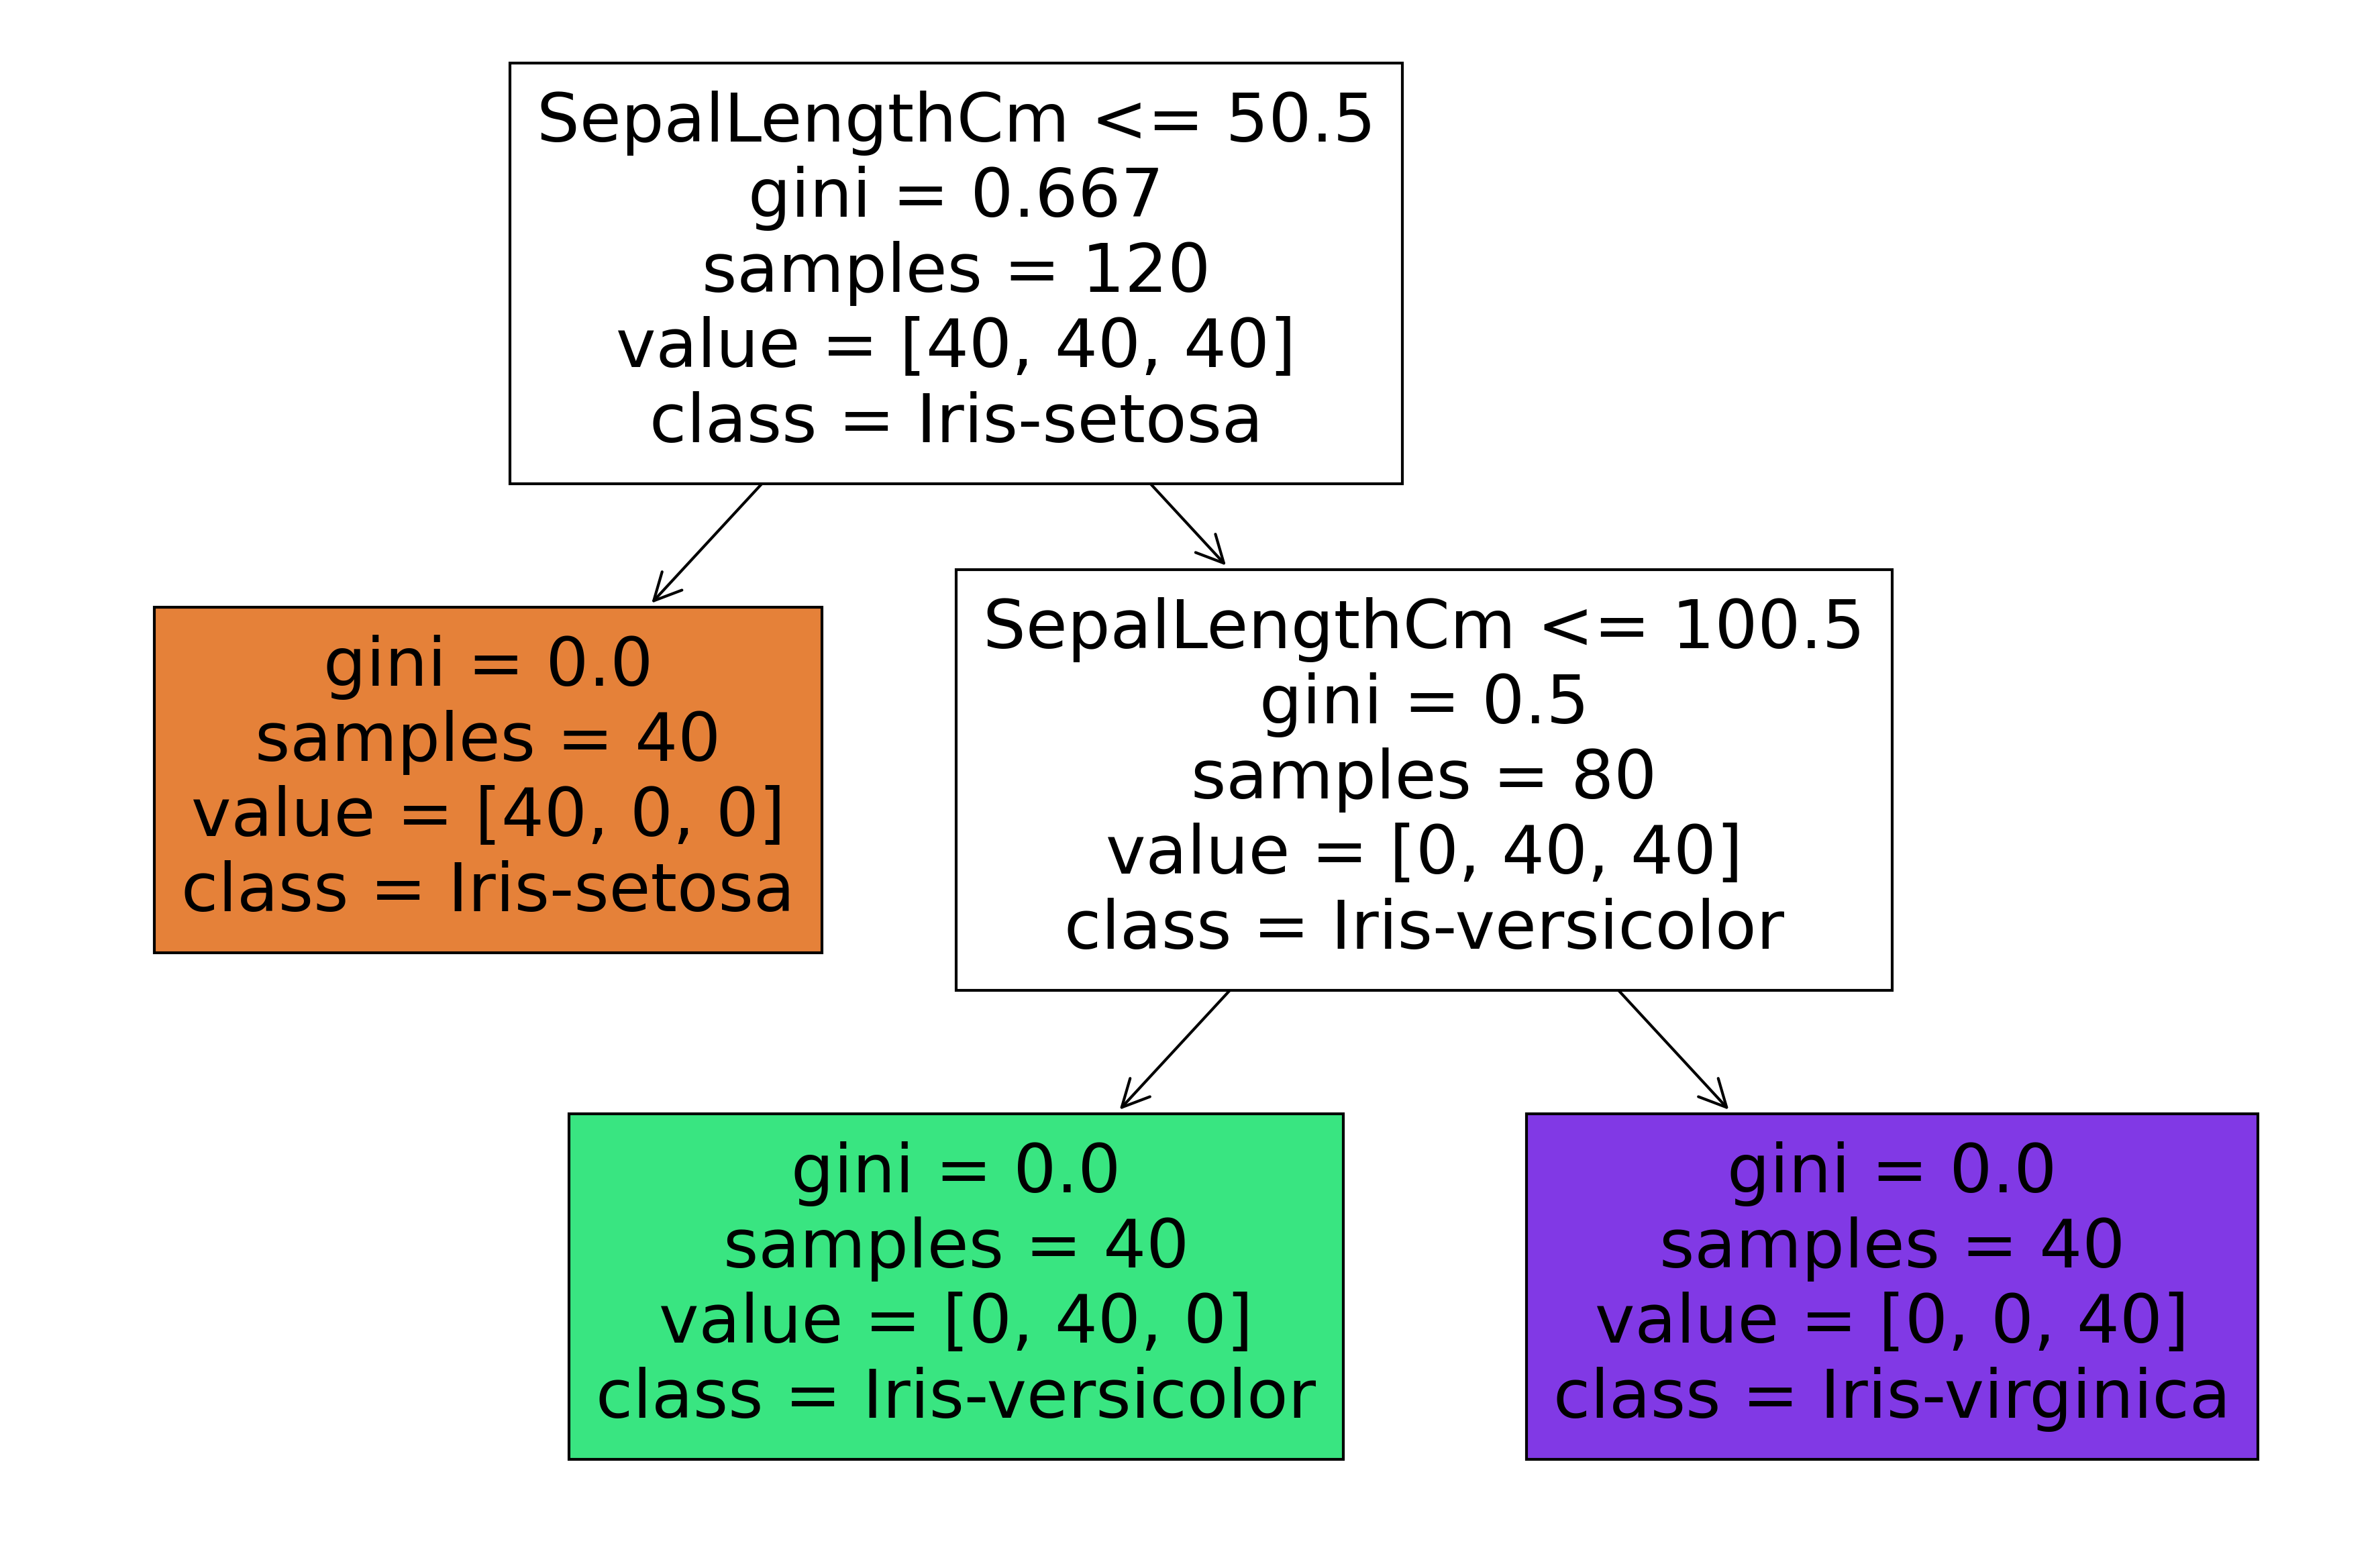

In [36]:
from sklearn import tree
fn=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
cn=["Iris-setosa","Iris-versicolor","Iris-virginica"]
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10),dpi=300)
tree.plot_tree(dt,
               feature_names=fn,
               class_names=cn,
               filled=True)
fig.savefig('imagename.png')